In [59]:
import numpy as np
import h5py
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

In [60]:
with h5py.File('test_run.mat', 'r') as f:
    f.keys()

    n = np.array(f.get('N'))
    N = int(n[0])
    r = np.array(f.get('rows'))[0]
    rows = int(r[0])
    tmax = np.array(f.get('tmax'))
    tmax = int(tmax[0])
    data = np.array(f.get('RES'))




In [61]:

radius = np.linspace(100, 150, num = rows)
radius = radius.reshape(rows,1)
theta = np.linspace(0, 2*np.pi, num = N, endpoint = False)

X = np.cos(theta)
X = np.reshape(X,(1,N))
Y = np.sin(theta)
Y = np.reshape(Y,(1,N))

X_all = np.matmul(radius, X)
X_all = np.repeat(X_all[:, :, np.newaxis], tmax, axis=2)
Y_all = np.matmul(radius, Y)
Y_all = np.repeat(Y_all[:, :, np.newaxis], tmax, axis=2)

X_all.shape

radius







array([[100.        ],
       [105.55555556],
       [111.11111111],
       [116.66666667],
       [122.22222222],
       [127.77777778],
       [133.33333333],
       [138.88888889],
       [144.44444444],
       [150.        ]])

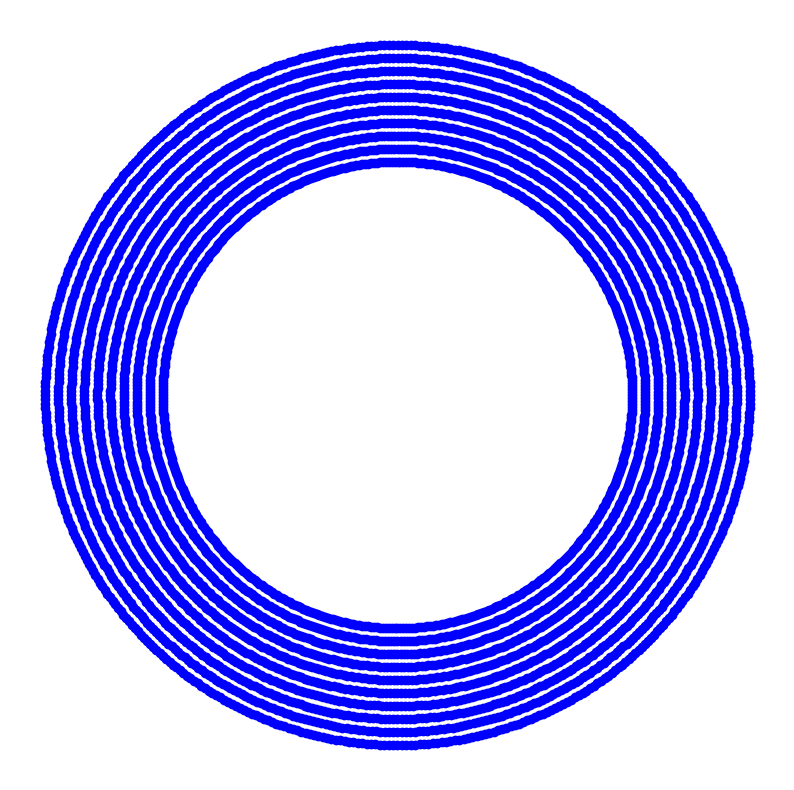

In [62]:
fig,ax = plt.subplots(figsize=(10,10))

ax.axis('off')

scatter1 = ax.scatter(X_all[:,:,0], Y_all[:,:,0], color = "blue")

In [63]:
ind = np.flip(np.argwhere(data[1,:,:]), axis=1)

print(ind)

X_new = X_all[ind[:,0],ind[:,1],1]
Y_new = Y_all[ind[:,0],ind[:,1],1]
print(X_new)

[[1 1]
 [0 2]
 [1 2]
 [2 2]
 [1 3]]
[105.54722133  99.96841893 105.52221998 111.07602103 105.48055545]


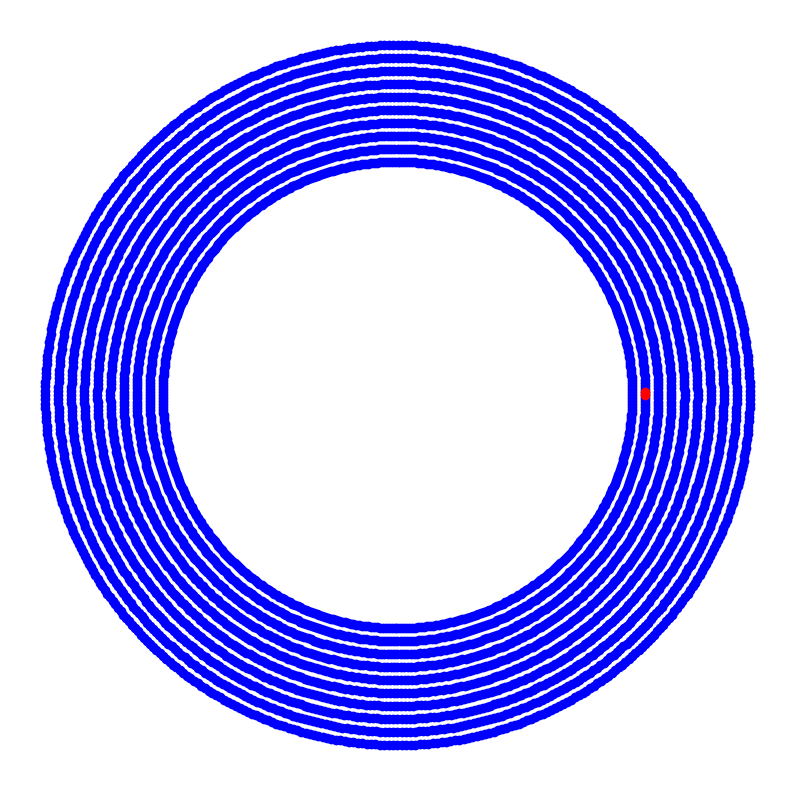

In [64]:
speed = 20

duration = tmax / speed

fps = 5

num_frames = duration * fps

fig,ax = plt.subplots(figsize=(10,10))

ax.axis('off')

scatter1 = ax.scatter(X_all[:,:,0], Y_all[:,:,0], color = "blue")
scatter2 = ax.scatter(X_all[:,:,0], Y_all[:,:,0], color = "red")

def update(frame):
    # Generate new random data for both datasets
    t = int(frame*tmax / num_frames)
    ind = np.flip(np.argwhere(data[t,:,:] == 1), axis=1)
    X_new = X_all[ind[:,0],ind[:,1],t]
    Y_new = Y_all[ind[:,0],ind[:,1],t]   

    scatter2.set_offsets(np.column_stack((X_new, Y_new)))
    
    # Return a tuple of the scatterplots to be updated
    return scatter1, scatter2




anim = FuncAnimation(fig, update, frames=int(num_frames), interval=int(1000/fps))

anim.save('animation.mp4', writer='ffmpeg')